## Spanish Translation A/B Test

Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that **Spain-based users have a much higher conversion rate than any other Spanish-speaking country**. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

**You are asked to:**

Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better

Explain why that might be happening. Are the localized translations really worse?

If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.


In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats



In [2]:
# read files 
test=pd.read_csv('/Users/gloriagong/Documents/ds/take home challenge/2-A-B-Testing-E-Commerce-site-Spanish-Translation/test_table.csv')

user=pd.read_csv('/Users/gloriagong/Documents/ds/take home challenge/2-A-B-Testing-E-Commerce-site-Spanish-Translation/user_table.csv')

In [3]:
# take a look
print(test.head())
print('_______________________________________________________________________')
print(user.head())

   user_id        date  source  device browser_language ads_channel  \
0   315281  2015-12-03  Direct     Web               ES         NaN   
1   497851  2015-12-04     Ads     Web               ES      Google   
2   848402  2015-12-04     Ads     Web               ES    Facebook   
3   290051  2015-12-03     Ads  Mobile            Other    Facebook   
4   548435  2015-11-30     Ads     Web               ES      Google   

       browser  conversion  test  
0           IE           1     0  
1           IE           0     1  
2       Chrome           0     0  
3  Android_App           0     1  
4      FireFox           0     1  
_______________________________________________________________________
   user_id sex  age    country
0   765821   M   20     Mexico
1   343561   F   27  Nicaragua
2   118744   M   23   Colombia
3   987753   F   27  Venezuela
4   554597   F   20      Spain


In [4]:
# merge two tables into one
df=pd.merge(test, user, on='user_id', how='left')
df.describe(include='all')

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
count,453321.000000,453321,453321,453321,453321,181877,453321,453321.000000,453321.000000,452867,452867.000000,452867
unique,NaN,5,3,2,3,5,7,NaN,NaN,2,NaN,17
top,NaN,2015-12-04,Ads,Web,ES,Facebook,Android_App,NaN,NaN,M,NaN,Mexico
freq,NaN,141163,181877,251565,377547,68425,155135,NaN,NaN,264485,NaN,128484
mean,499937.514728,NaN,NaN,NaN,NaN,NaN,NaN,0.049579,0.476446,NaN,27.130740,NaN
std,288665.193436,NaN,NaN,NaN,NaN,NaN,NaN,0.217073,0.499445,NaN,6.776678,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249816.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN
50%,500019.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,26.000000,NaN
75%,749522.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,31.000000,NaN


In [5]:
# check the null values
df.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [6]:
df[df['ads_channel'].isnull()].source.value_counts()

SEO       180610
Direct     90834
Name: source, dtype: int64

It's normal to see null values in ads_channel. If the user doesn't come via ad, then the value is null because the user is coming from SEO or Direct

In [7]:
df.loc[df['ads_channel'].isnull(),'ads_channel']='No Ads'

In [8]:
df[df['country']=='Spain'].groupby('test').count()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,sex,age,country
test,,,,,,,,,,,
0,51782,51782,51782,51782,51782,51782,51782,51782,51782,51782,51782


since all Spain users are in the control group, so we'll remove spain users in the test

In [9]:
df_no_spain=df[df['country']!='Spain']
df_no_spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401539 entries, 1 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           401539 non-null  int64  
 1   date              401539 non-null  object 
 2   source            401539 non-null  object 
 3   device            401539 non-null  object 
 4   browser_language  401539 non-null  object 
 5   ads_channel       401539 non-null  object 
 6   browser           401539 non-null  object 
 7   conversion        401539 non-null  int64  
 8   test              401539 non-null  int64  
 9   sex               401085 non-null  object 
 10  age               401085 non-null  float64
 11  country           401085 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 39.8+ MB


In [10]:
#remove the Nan rows that have no country, sex and age info

df_no_spain=df_no_spain.dropna(axis=0, subset=['sex','age','country'],how='any')
df_no_spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401085 entries, 1 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           401085 non-null  int64  
 1   date              401085 non-null  object 
 2   source            401085 non-null  object 
 3   device            401085 non-null  object 
 4   browser_language  401085 non-null  object 
 5   ads_channel       401085 non-null  object 
 6   browser           401085 non-null  object 
 7   conversion        401085 non-null  int64  
 8   test              401085 non-null  int64  
 9   sex               401085 non-null  object 
 10  age               401085 non-null  float64
 11  country           401085 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 39.8+ MB


## Exploratory Analysis and Data Visualization

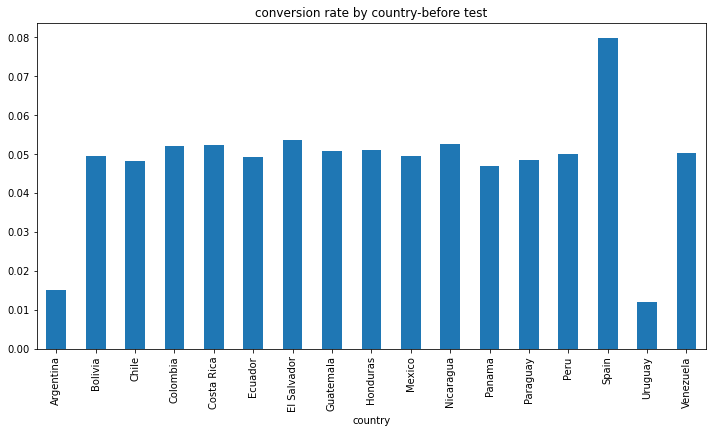

In [11]:
# first to verify if Spanish users have higher conversion rate than any other Spanish-speaking country
plt.figure(figsize=(12,6))
plt.title('conversion rate by country-before test')
df[df['test']==0].groupby('country')['conversion'].mean().plot(kind='bar')

It's true that Spanish users have higher conversion rate

### Next, Let's do some exploratory analysis about the test

Text(0.5, 1.0, 'conversion rate by test group')

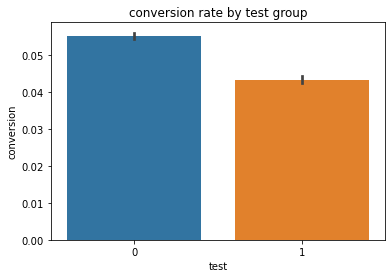

In [12]:
sns.barplot(x='test', y='conversion', data=df).set_title('conversion rate by test group')

Based on the graph, it seems like the older version performed better

In [13]:
df.columns

Index(['user_id', 'date', 'source', 'device', 'browser_language',
       'ads_channel', 'browser', 'conversion', 'test', 'sex', 'age',
       'country'],
      dtype='object')

The conversion rate does not vary by different source

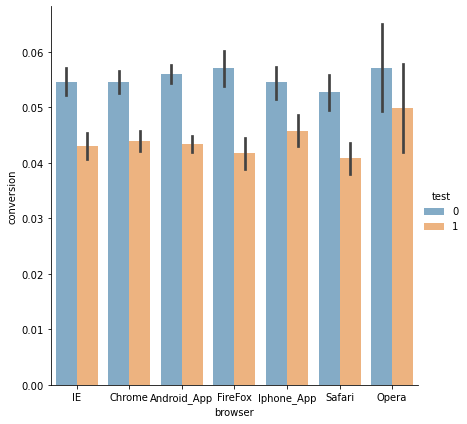

In [14]:
g=sns.catplot(data=df, x='browser',y='conversion',hue='test', kind='bar',alpha=.6, height=6)

### AB testing result analysis

In [15]:
# sample ratio:

print('the control sample ratio is', len(df_no_spain[df_no_spain['test']==0])/len(df_no_spain))
print('the test sample ratio is', len(df_no_spain[df_no_spain['test']==1])/len(df_no_spain))

the control sample ratio is 0.46202425919692836
the test sample ratio is 0.5379757408030716


so the sample is about 50:50 split

#### Steps to analyze the ab test:

- Calculate the overall all countries test result as a whole
- See if that actually made things worse (& in this case, the result should be yes)

The most likely reason for weird A/B test results are:  
1. Not enough sample sizes 
2. Some bias has been introduced in the experiment sampling random.

steps to analyze if there's bias:
- Look over it by date, and see if it varies drastically
- Look over it by country, and find out different things 

#### Let's calculate the test result as a whole

Here we'll perform independent t-test to compare the conversion of two groups. 

-H0: P(conversion_test)-P(conversion_control)=0

- H1: P(conversion_test)-P(conversion_control) !=0

In [16]:
# first, let's check the variance between two groups

df_no_spain.groupby('test')['conversion'].std()

test
0    0.214383
1    0.203781
Name: conversion, dtype: float64

In [17]:
test=df_no_spain.loc[df_no_spain['test']==1,'conversion']
control=df_no_spain.loc[df_no_spain['test']==0,'conversion']

print(stats.ttest_ind(test,control, equal_var=False))

print('the mean conversion in test group is', df_no_spain[df_no_spain['test']==1]['conversion'].mean())
print('the mean conversion in control group is',df_no_spain[df_no_spain['test']==0]['conversion'].mean())

Ttest_indResult(statistic=-7.353895203080277, pvalue=1.9289178577799033e-13)
the mean conversion in test group is 0.043411161678422794
the mean conversion in control group is 0.04829179055749524


Based on the test, it means that the difference between control & test group (0.048-0.043)/0.043=12% is **significant different**!

Translating back to business problem, it means the localized language actually made things worse

#### Let's see the sample ratio by dates

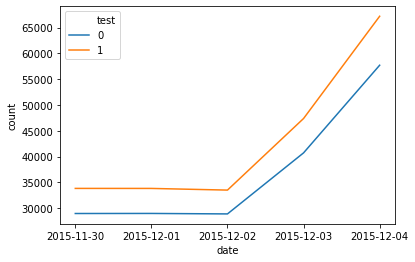

In [18]:
# plot the sample ratio by date

df_no_spain_sample=df_no_spain.groupby(['date','test'])['user_id'].agg(['count']).reset_index()


sns.lineplot(x='date',y='count', hue='test', data=df_no_spain_sample)

Based on the graph, the ratio between control and test group is consistent over dates

#### Let's see if conversion rate between two groups vary by dates

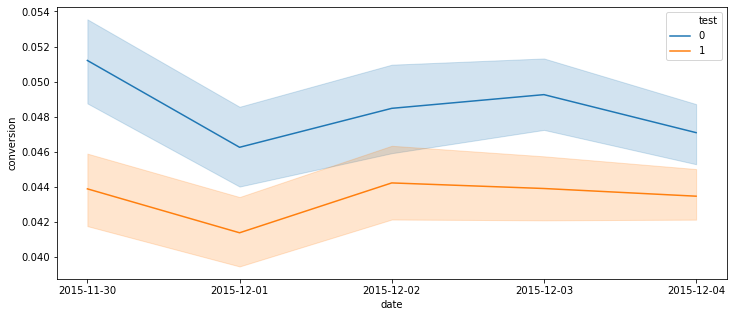

In [19]:
fig,ax=plt.subplots(figsize=[12,5])
sns.lineplot(x='date',y='conversion',hue='test',data=df_no_spain)


We can see that:

* conversion rate in test group is consistently lower than in control group

* the test only ran for 5 days, which we should run at least a week to catch the cycle

#### Let's check the conversion rate by countries

In [20]:
grouped=df_no_spain.groupby(['country','test'])['conversion'].agg(['mean','count'])
grouped=grouped.reset_index()

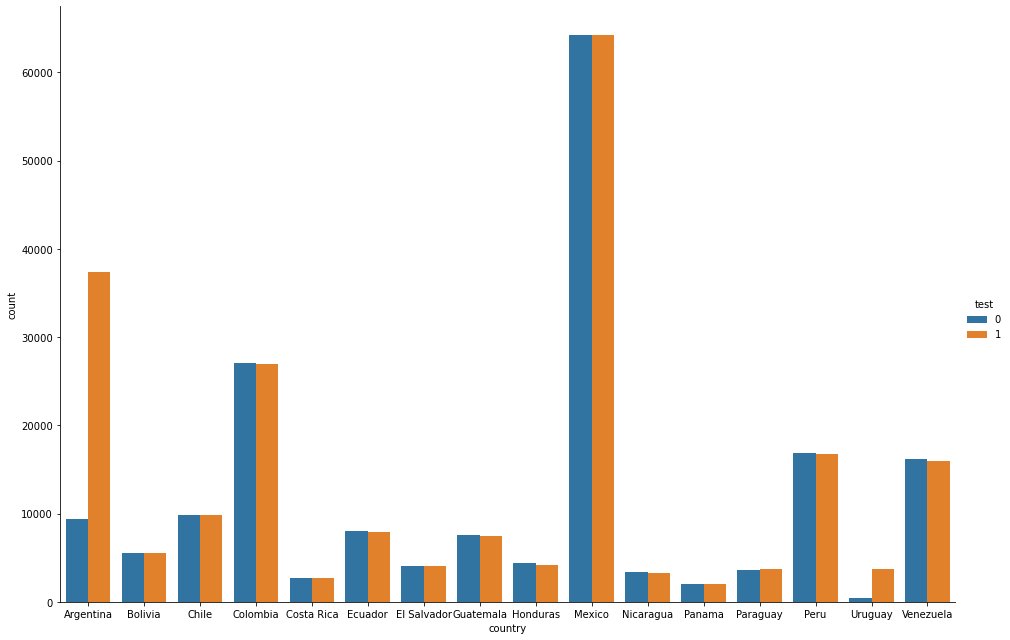

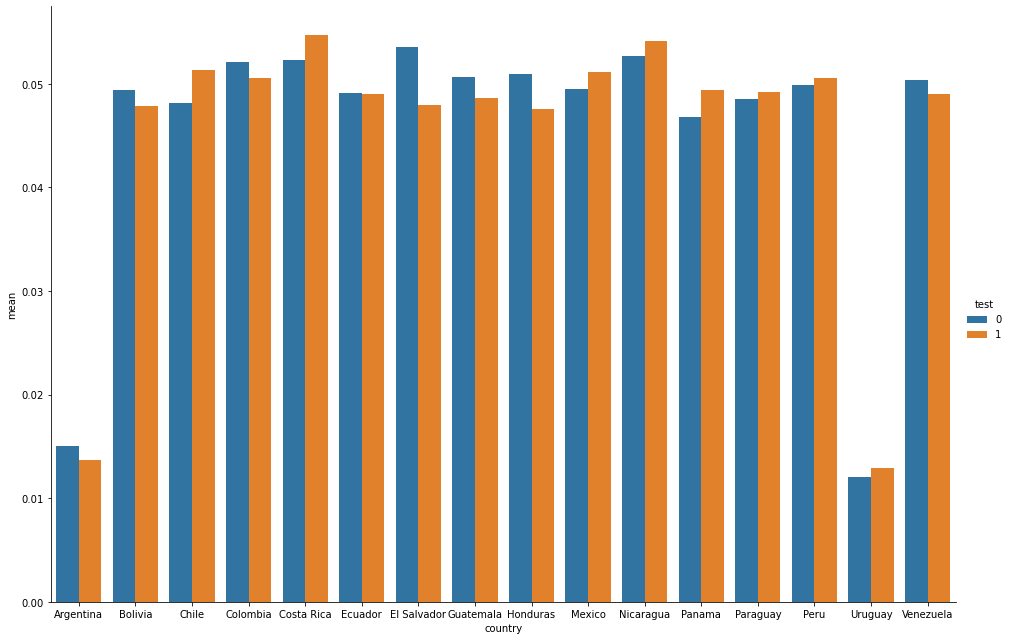

In [21]:
# plot the number:
for col in ['count','mean']:
    sns.catplot(x='country',y=col,hue='test',data=grouped,kind='bar', height=9, aspect=1.5)

We can see that the **sample counts in control and test group in Argentina and Uruguay is not 50:50 split.** If the sample is assinged randomly into groups, the sample size between two groups should be roughly the same. 

Therefore, there is something going on in the sample split

#### We can also build decision tree to understand feature importance and verify if country really plays important role in this dataset

In [22]:
# first, let's convert categorical variables into numeric variables
    
df_no_spain.loc[:,['browser_language', 'country', 'browser', 'ads_channel', 'device', 'source', 'sex']].info()

df_no_spain.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401085 entries, 1 to 453320
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   browser_language  401085 non-null  object
 1   country           401085 non-null  object
 2   browser           401085 non-null  object
 3   ads_channel       401085 non-null  object
 4   device            401085 non-null  object
 5   source            401085 non-null  object
 6   sex               401085 non-null  object
dtypes: object(7)
memory usage: 34.5+ MB


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,No Ads,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,No Ads,Android_App,0,0,M,35.0,Mexico


In [23]:
df_no_spain.loc[:,'browser_language']=df_no_spain['browser_language'].astype(str)
df_no_spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401085 entries, 1 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           401085 non-null  int64  
 1   date              401085 non-null  object 
 2   source            401085 non-null  object 
 3   device            401085 non-null  object 
 4   browser_language  401085 non-null  object 
 5   ads_channel       401085 non-null  object 
 6   browser           401085 non-null  object 
 7   conversion        401085 non-null  int64  
 8   test              401085 non-null  int64  
 9   sex               401085 non-null  object 
 10  age               401085 non-null  float64
 11  country           401085 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 49.8+ MB


In [24]:
df_no_spain_encoded=df_no_spain.copy()

from sklearn.preprocessing import LabelEncoder
for feat in ['browser_language', 'country', 'browser', 'device', 'source', 'sex']:
    lbl_enc=LabelEncoder()
    lbl_enc.fit(df_no_spain_encoded[feat])
    df_no_spain_encoded[feat]=lbl_enc.transform(df_no_spain_encoded[feat]) 

In [25]:
df_no_spain_encoded.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,0,1,1,Google,3,0,1,1,21.0,9
3,290051,2015-12-03,0,0,2,Facebook,0,0,1,0,22.0,9
4,548435,2015-11-30,0,1,1,Google,2,0,1,1,19.0,9
5,540675,2015-12-03,1,0,1,No Ads,0,0,1,0,22.0,15
6,863394,2015-12-04,2,0,2,No Ads,0,0,0,1,35.0,9


In [26]:
# fit random forest to get the feature importance

from sklearn.ensemble import RandomForestClassifier
features = ['browser_language', 'country', 'browser', 'device', 'source', 'sex', 'age']
model = RandomForestClassifier()
model.fit(df_no_spain_encoded[features],df_no_spain_encoded['test'])
feature_importances = model.feature_importances_
importance = pd.Series(feature_importances, index = features)

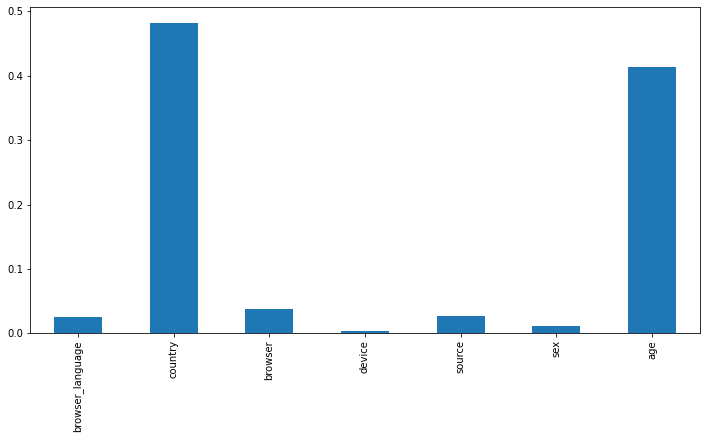

In [27]:
plt.figure(figsize=(12, 6))
importance.plot(kind = 'bar')

We can see that country plays an important role in determinig whether the sample is in control or test group!

Because the sample ratio is mismatched in some countries, we can run test by countries individually to correct the bias

In [28]:
country_list=list(df_no_spain['country'].unique())
p_val=[]
t_stats=[]
for country in country_list:
    test=df_no_spain.loc[(df_no_spain['test']==1) &(df_no_spain['country']==country),'conversion']
    control=df_no_spain.loc[(df_no_spain['test']==0)& (df_no_spain['country']==country),'conversion']
    g=stats.ttest_ind(test,control,equal_var=False)
    p_val.append(g[1])
    t_stats.append(g[0])

test_result=pd.DataFrame(data={'country':country_list,'p_val':p_val,'t_value':t_stats})

In [29]:
test_result

,country,p_val,t_value
0,Mexico,0.165544,1.386674
1,Venezuela,0.573702,-0.562614
2,Bolivia,0.718885,-0.359958
3,Colombia,0.423719,-0.799992
4,Uruguay,0.879764,0.151343
5,El Salvador,0.248127,-1.154994
6,Nicaragua,0.780400,0.278809
7,Peru,0.771953,0.289824
8,Costa Rica,0.687876,0.401761
9,Chile,0.302848,1.030373


After segementing by countries, we can see that the test is **not significant** between test & control group.

Therefore, the localized translation did not make things worse, although it didn't improve conversion rate